# Dataset Regresión Logística – Heart Disease Cleveland UCI

In [9]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  

In [11]:
#Cargamos el dataset y revisamos 
# Cargar el dataset
df = pd.read_csv('C:/Users/Luisj/Videos/archive (1)/heart_cleveland_upload.csv')  # Asegúrate de colocar el nombre correcto del archivo
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB

Valores nulos en el dataset:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca      

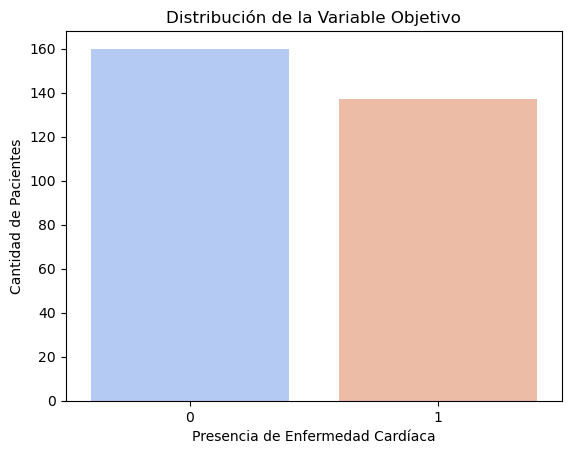

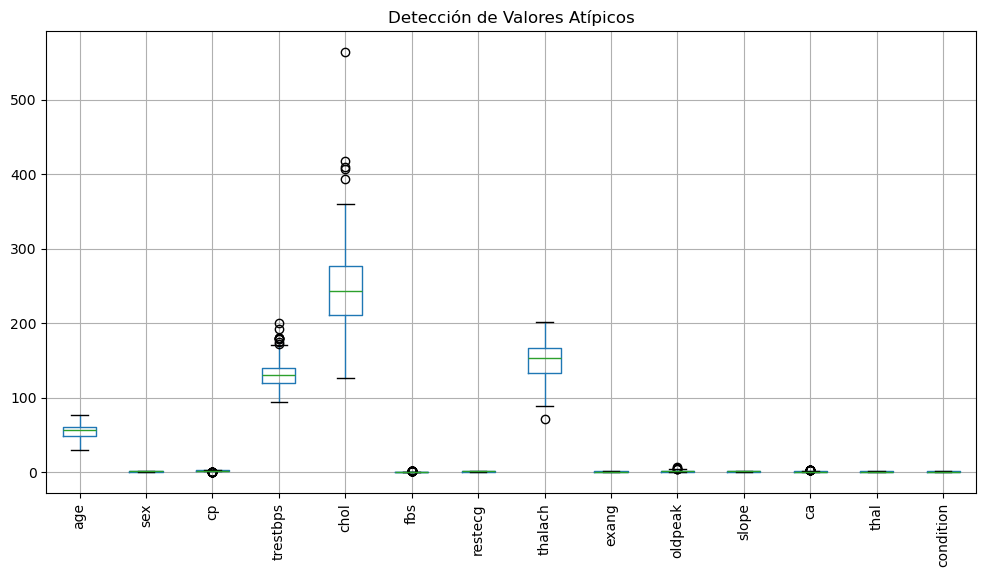

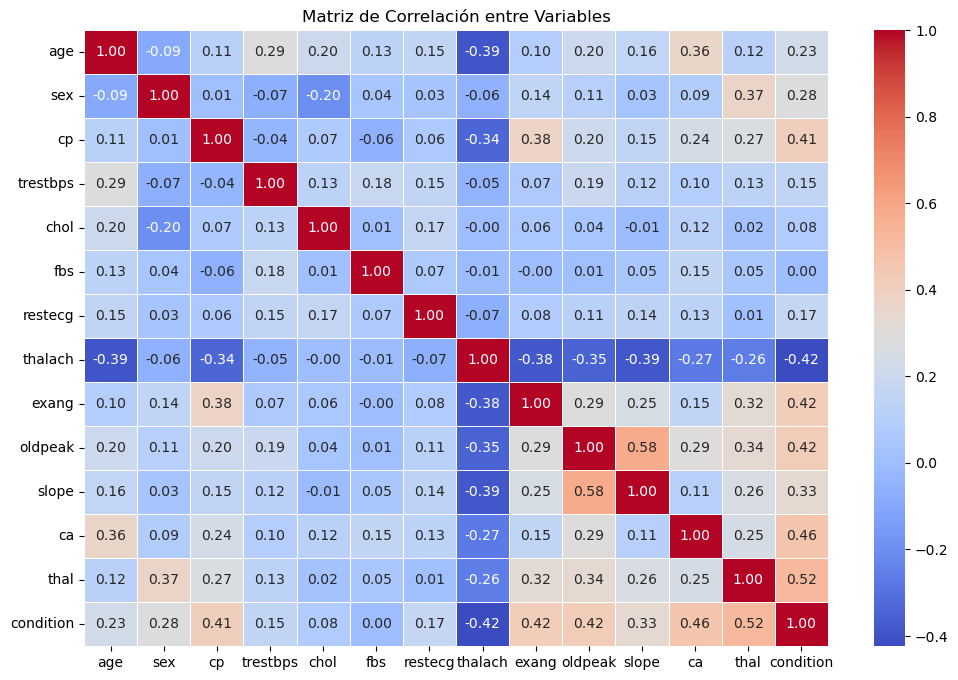

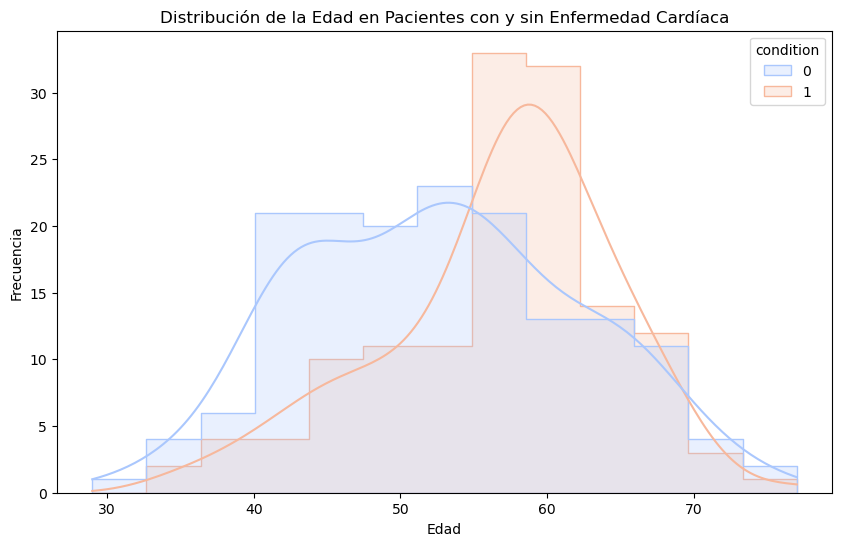

In [12]:
# Mostrar las primeras filas
df.head()
 
#Información General del Dataset
#Verificamos cuántos registros tiene, qué tipo de datos hay y si existen valores nulos.

# Información general del dataset
df.info()

# Verificar valores nulos
print("\nValores nulos en el dataset:")
print(df.isnull().sum())
#Si hay valores nulos, los trataremos en el preprocesamiento.

#Estadísticas Descriptivas
#Analizamos la distribución de los datos para detectar valores atípicos o tendencias.

# Descripción estadística
df.describe()
#Nos fijaremos especialmente en las columnas numéricas, buscando valores extremos o inconsistencias.

#Análisis de la Variable Objetivo
#Verificamos cómo se distribuye la variable objetivo (presencia de enfermedad cardíaca).

# Contar la frecuencia de cada clase en la variable objetivo
sns.countplot(data=df, x="condition", hue="condition", palette="coolwarm", legend=False)
plt.xlabel("Presencia de Enfermedad Cardíaca")
plt.ylabel("Cantidad de Pacientes")
plt.title("Distribución de la Variable Objetivo")
plt.show()

#Detección de Valores Atípicos
#Utilizaremos diagramas de caja (boxplots) para identificar valores atípicos en variables clave.
# Boxplots para identificar valores atípicos
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)  # Rotamos las etiquetas para mejor visualización
plt.title("Detección de Valores Atípicos")
plt.show()
#Si encontramos valores extremos, los trataremos en el preprocesamiento.

#Relaciones entre Variables
#Examinamos correlaciones entre variables y la variable objetivo.

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()
#Si hay variables altamente correlacionadas, podríamos reducir la dimensionalidad en el preprocesamiento.

#Relación de Variables con la Enfermedad
#Analizamos algunas relaciones entre características y la presencia de enfermedad.
# Distribución de la edad en pacientes con y sin enfermedad cardíaca
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", hue="condition", element="step", kde=True, palette="coolwarm")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Edad en Pacientes con y sin Enfermedad Cardíaca")
plt.show()
#También podemos analizar otras variables como el colesterol, presión arterial, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


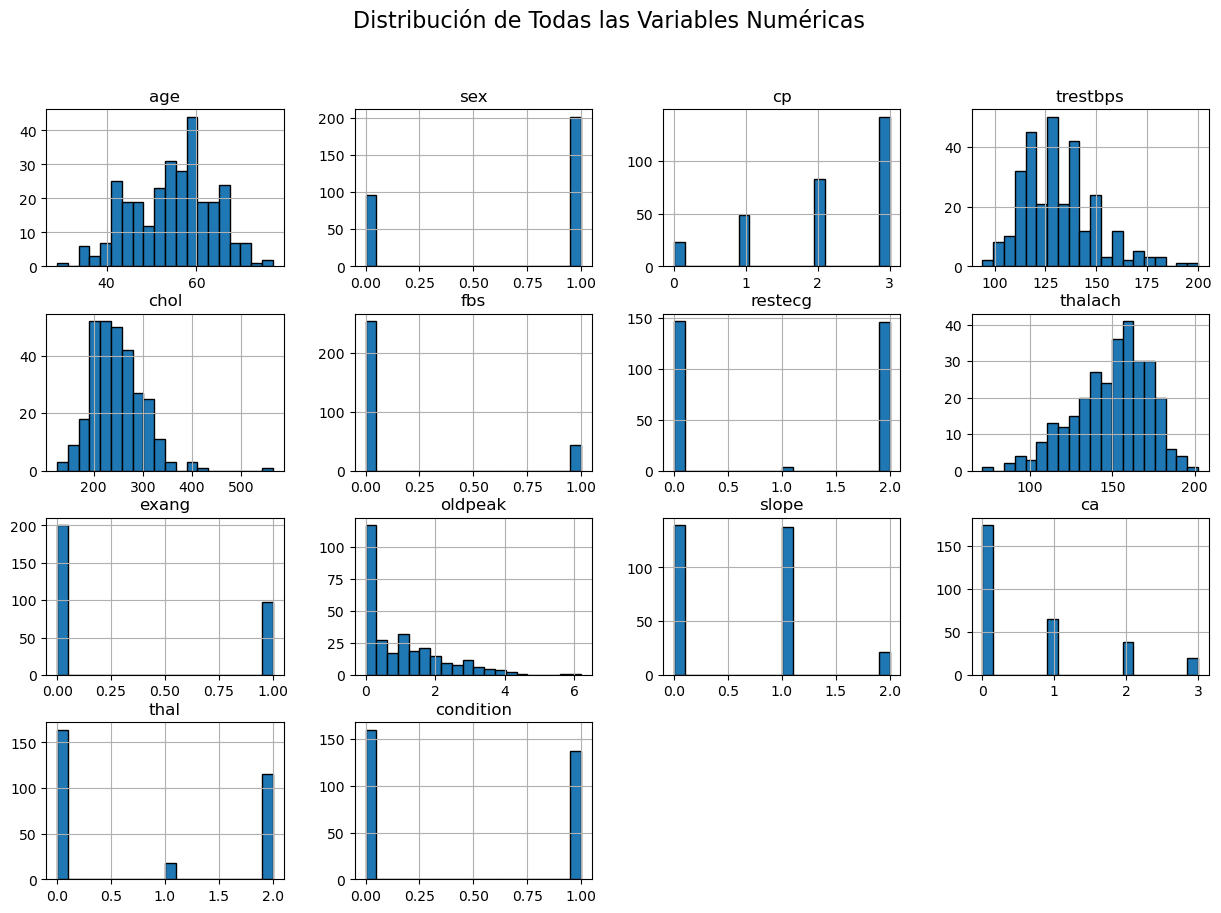

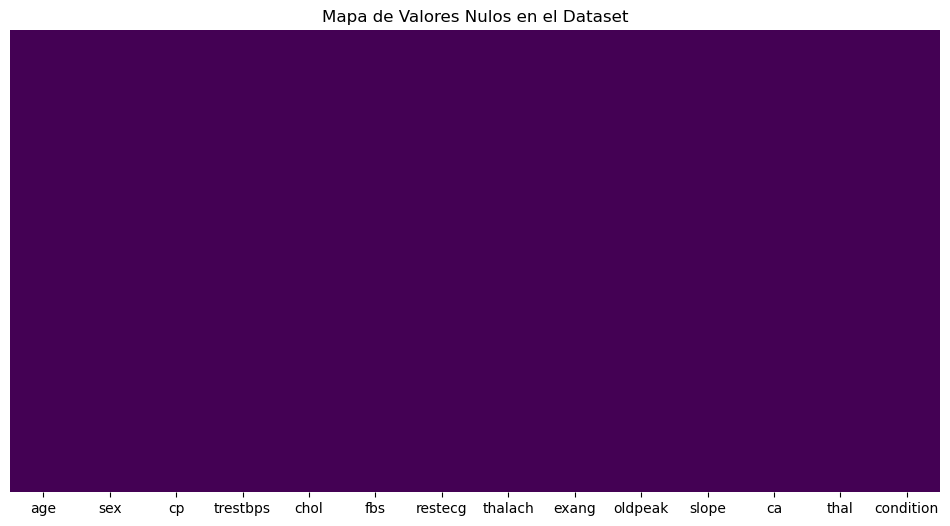

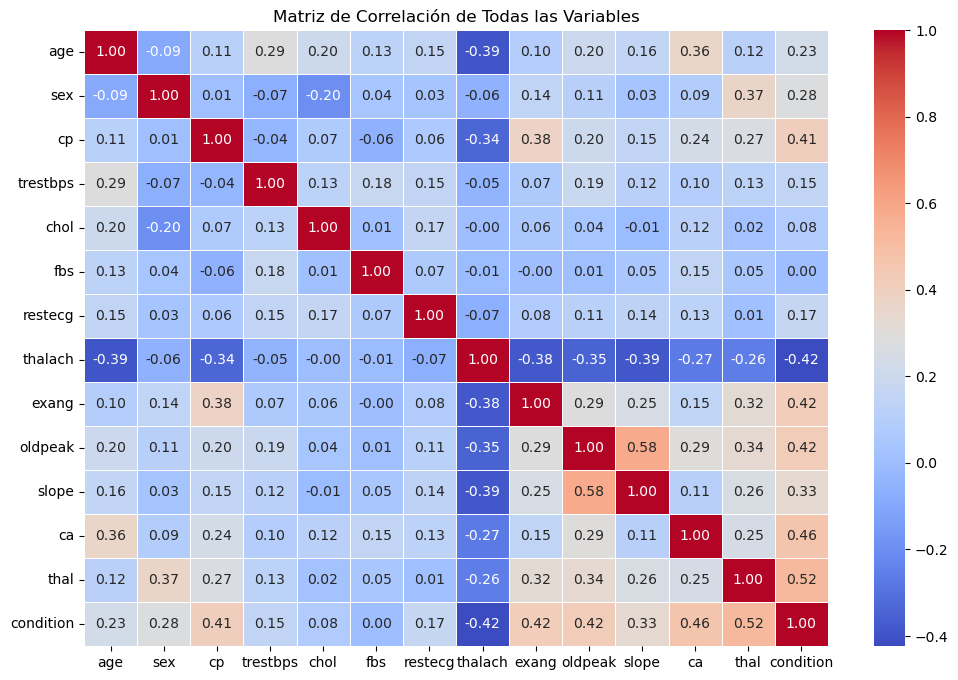

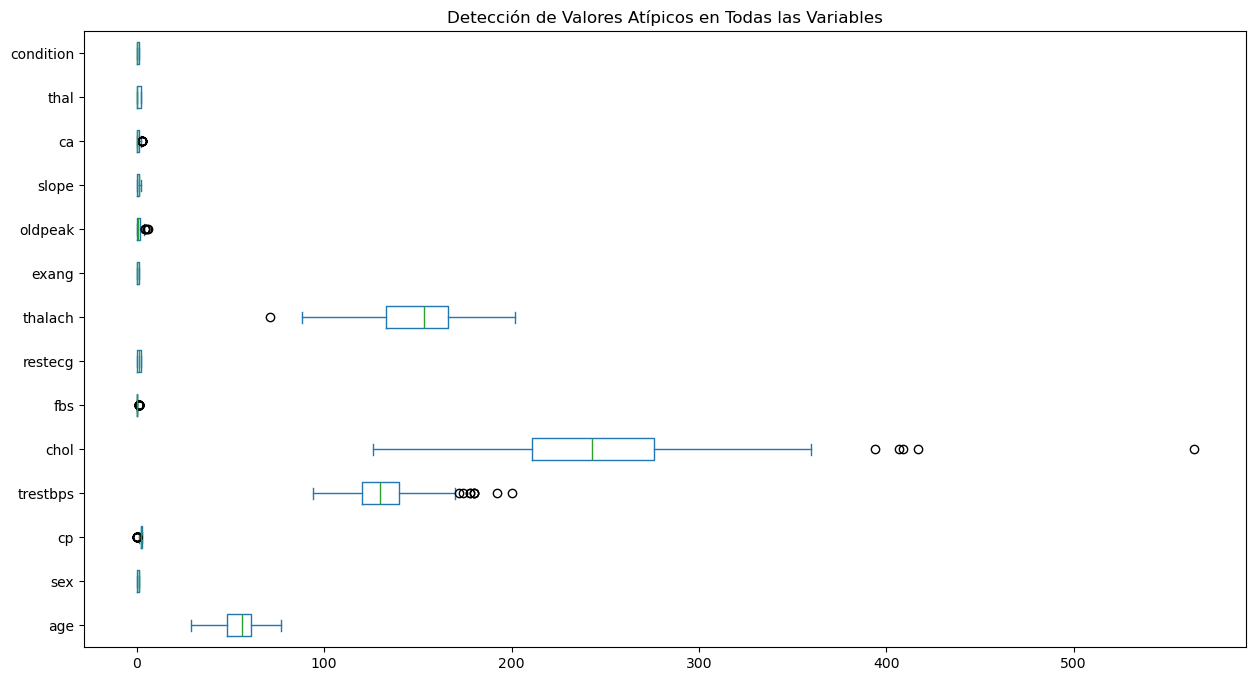

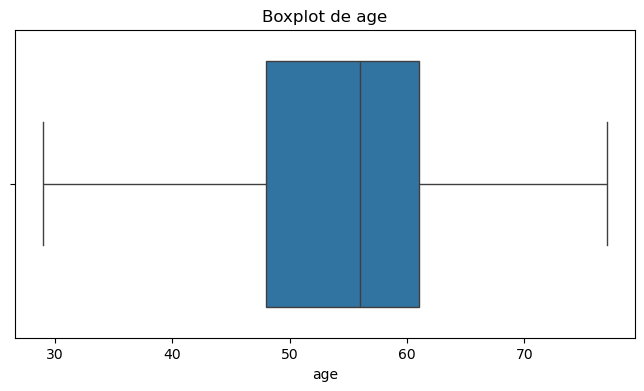

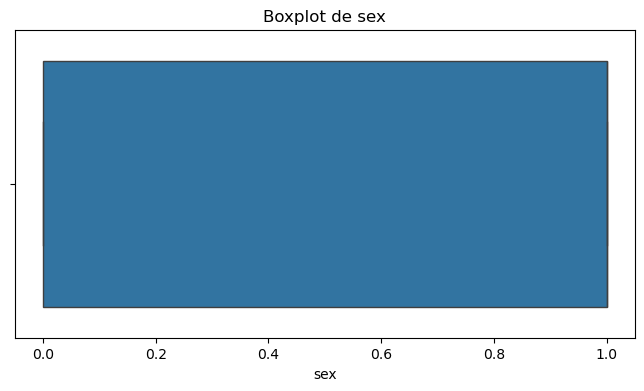

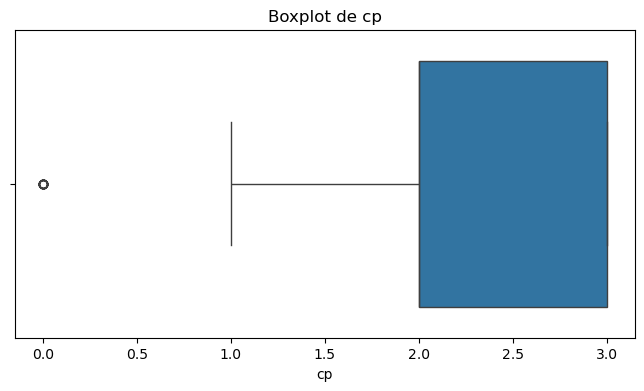

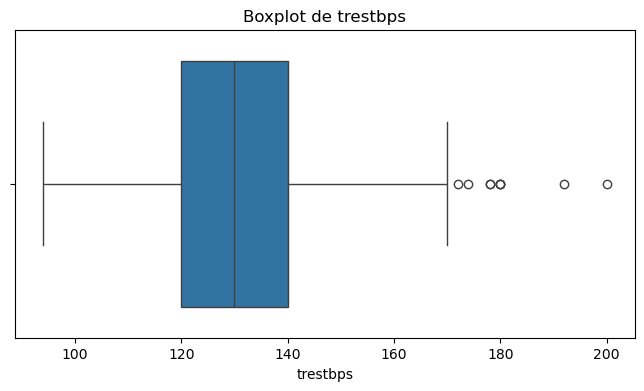

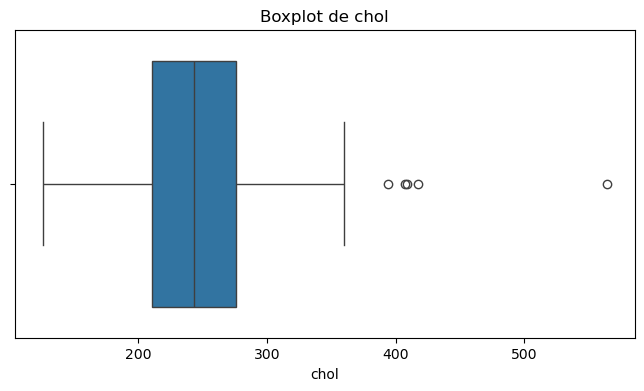

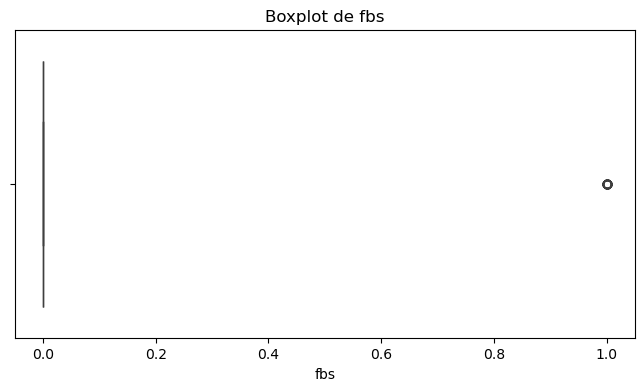

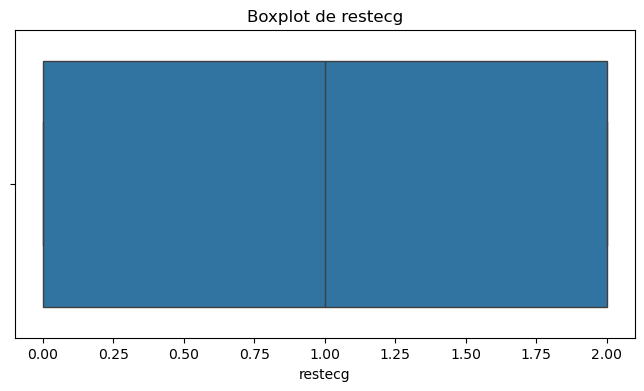

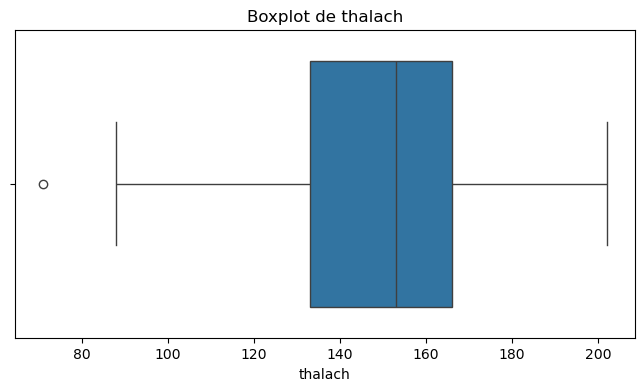

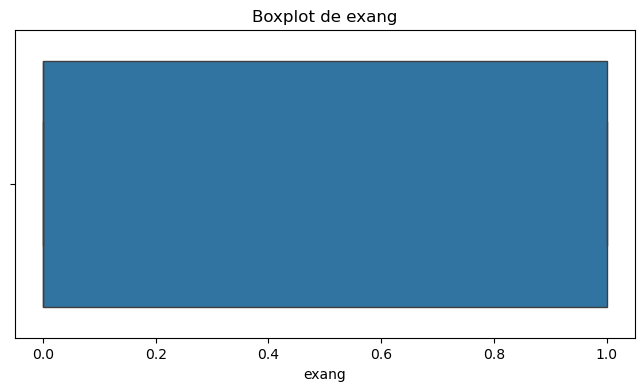

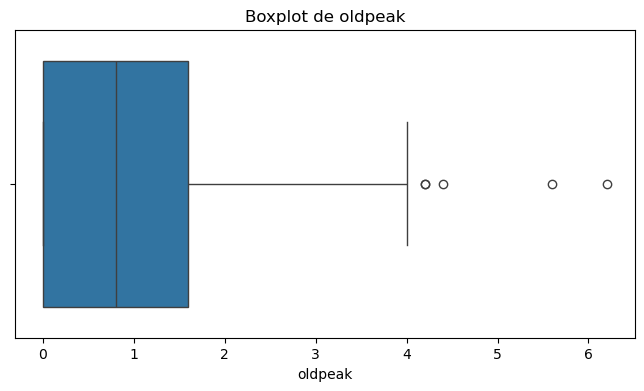

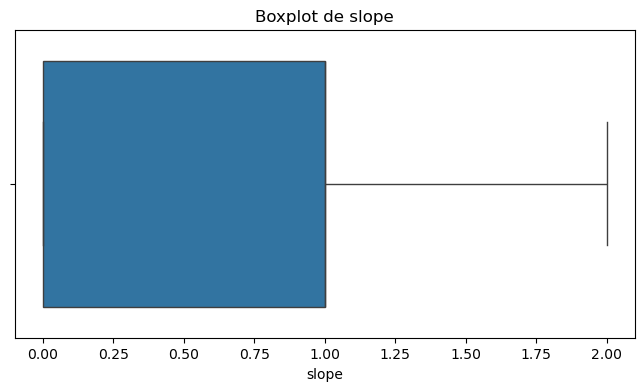

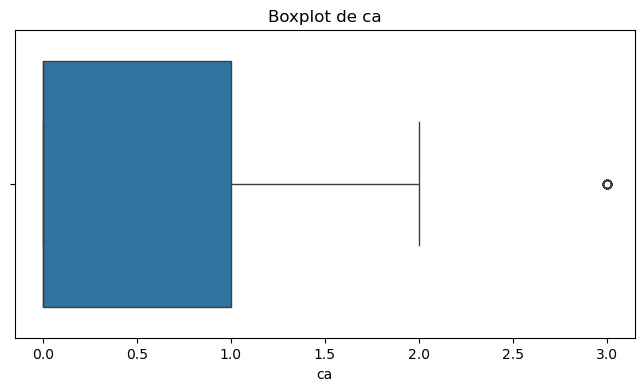

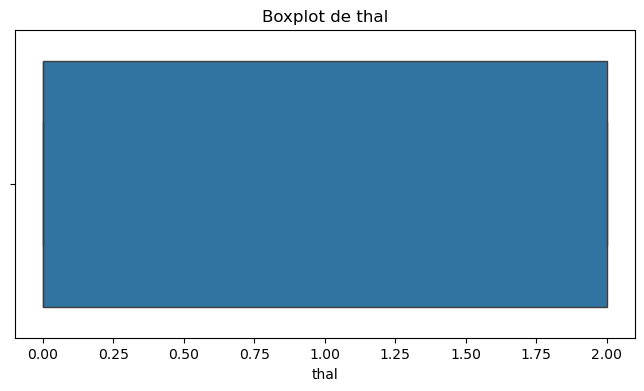

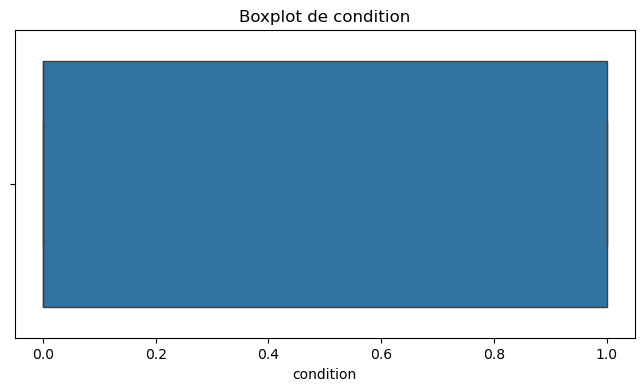

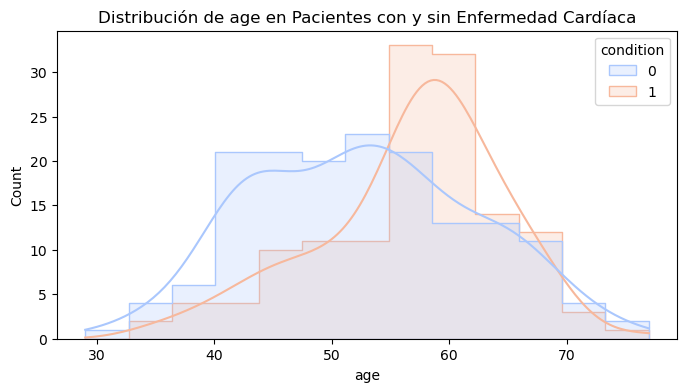

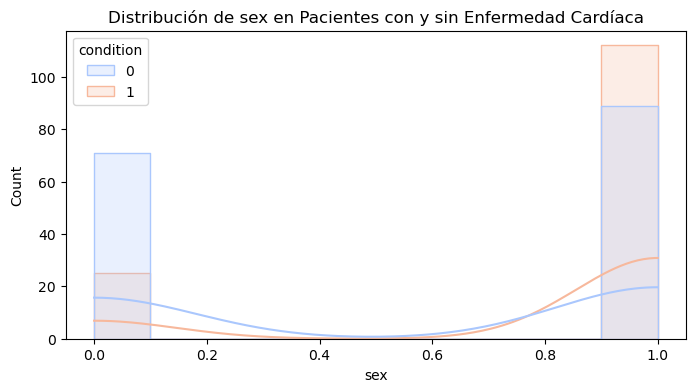

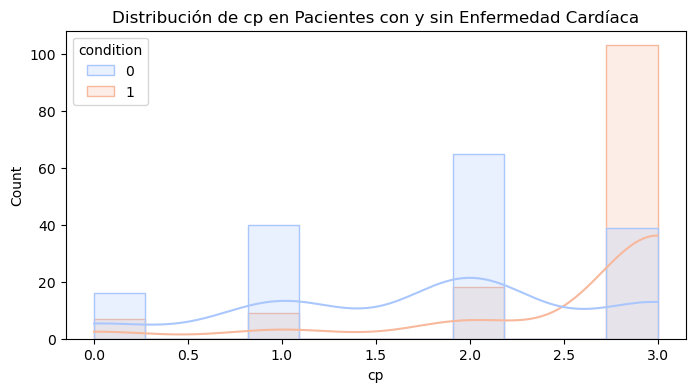

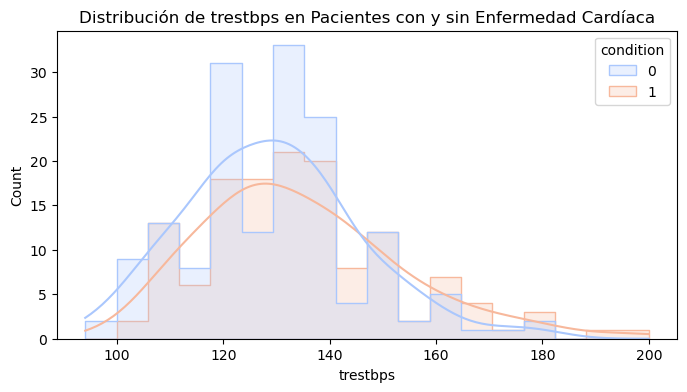

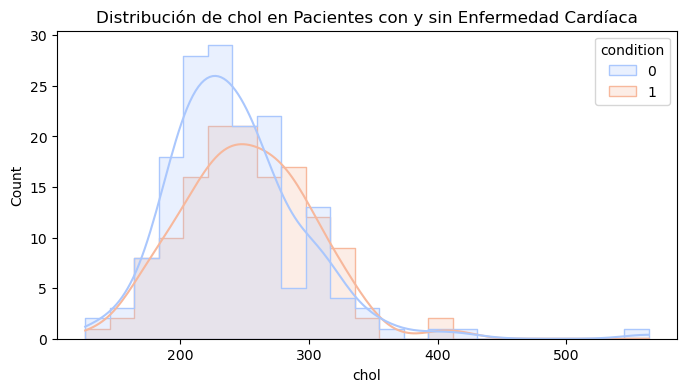

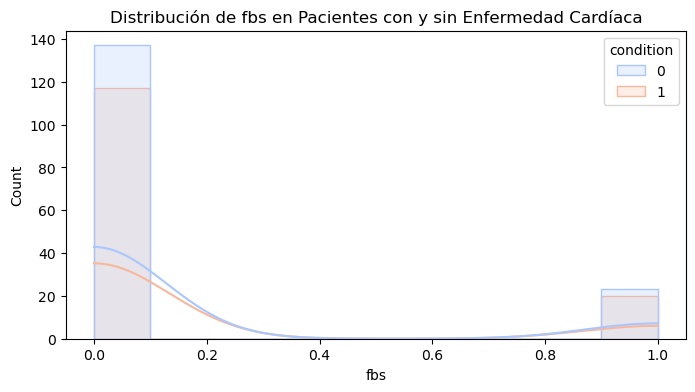

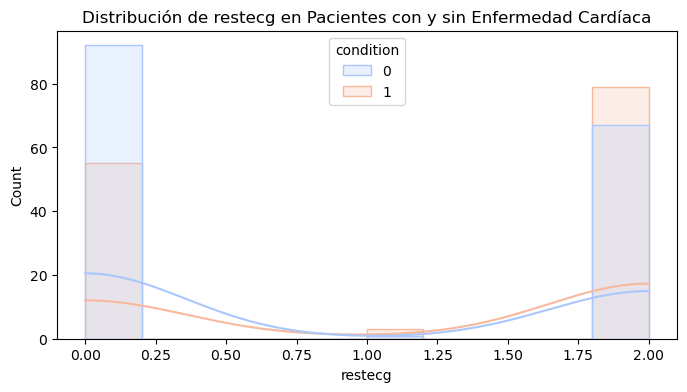

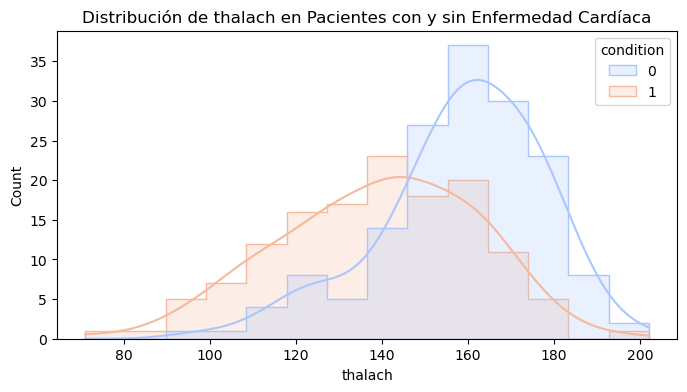

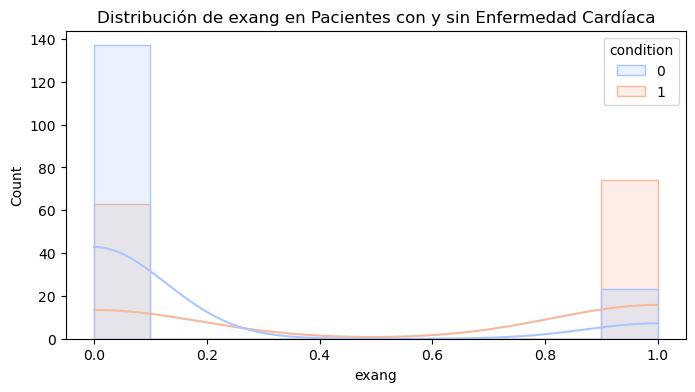

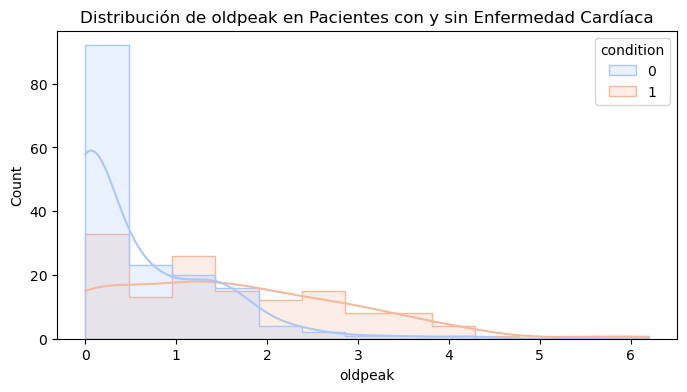

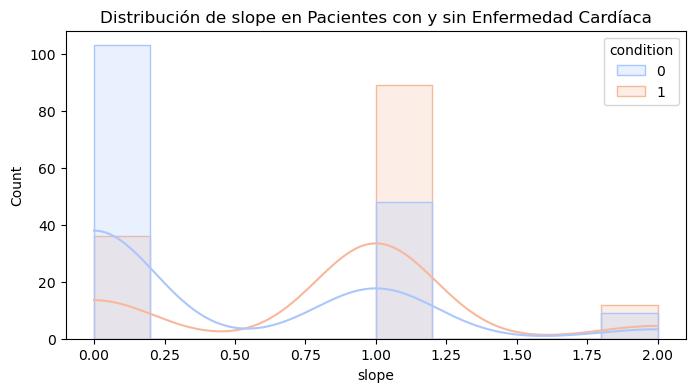

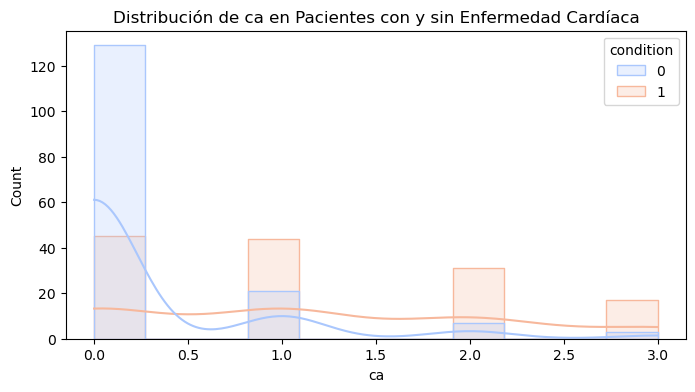

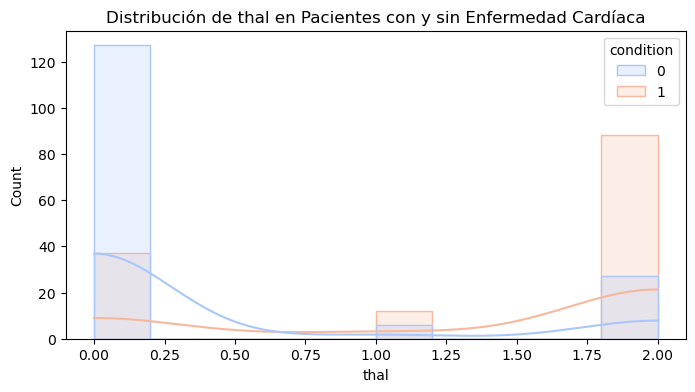

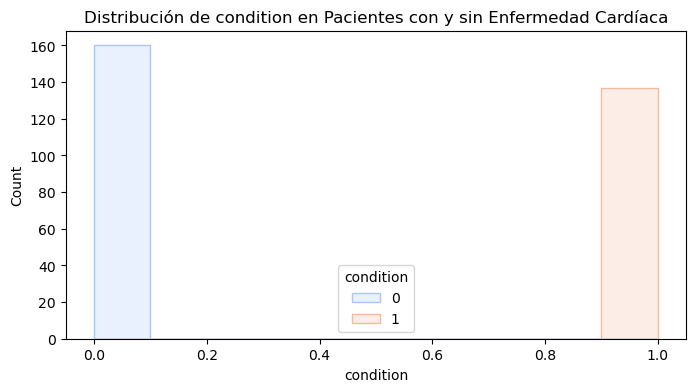

In [16]:
#Mostrar Toda la Tabla
# Mostrar toda la tabla (cuidado si es muy grande)
pd.set_option("display.max_rows", None)  # Mostrar todas las filas
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
df
# Resumen de Datos
#Obtenemos información detallada de todas las columnas.

# Información general de todo el dataset
df.info()

# Estadísticas de todas las columnas
df.describe(include="all")  # Incluye estadísticas de variables numéricas y categóricas

#Visualizar la Distribución de Todas las Variables
#Podemos ver cómo se distribuyen todas las variables numéricas usando histogramas:


df.hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Distribución de Todas las Variables Numéricas", fontsize=16)
plt.show()
 
#Detección de Valores Nulos en Toda la Tabla
#Si hay valores nulos, necesitamos tratarlos.
# Mostrar valores nulos en cada columna
df.isnull().sum()

#Visualización con heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de Valores Nulos en el Dataset")
plt.show()

#Correlación de Todas las Variables
#Un heatmap nos ayuda a ver relaciones entre todas las variables:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Todas las Variables")
plt.show()

#Boxplots para Detectar Valores Atípicos en Todas las Columnas
#Si quieres ver todas las variables en un solo gráfico:

df.plot(kind="box", figsize=(15, 8), vert=False)
plt.title("Detección de Valores Atípicos en Todas las Variables")
plt.show()

for column in df.select_dtypes(include=["number"]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot de {column}")
    plt.show()
    
#Análisis de la Variable Objetivo con Todas las Variables
# Relación entre cada variable numérica y la presencia de enfermedad
for column in df.select_dtypes(include=["number"]).columns:
    if column != "target":  # No graficamos la variable objetivo contra sí misma
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df, x=column, hue="condition", element="step", kde=True, palette="coolwarm")
        plt.title(f"Distribución de {column} en Pacientes con y sin Enfermedad Cardíaca")
        plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [18]:
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
file_path = 'C:/Users/Luisj/Videos/archive (1)/heart_cleveland_upload.csv'
df = pd.read_csv(file_path)

# Verificar valores nulos
print("Valores nulos antes del tratamiento:\n", df.isnull().sum())

# Rellenar valores nulos con la mediana de cada columna
df.fillna(df.median(numeric_only=True), inplace=True)

# Verificar nuevamente valores nulos
print("\nValores nulos después del tratamiento:\n", df.isnull().sum())

# Detección y eliminación de valores atípicos con el método IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Definir umbrales para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores dentro de los límites
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Escalar los datos numéricos con StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

# Guardar el dataset preprocesado
preprocessed_file = 'C:/Users/Luisj/Videos/archive (1)/heart_cleveland_preprocessed.csv'
df.to_csv(preprocessed_file, index=False)

print("\nPreprocesamiento completado. Archivo guardado en:", preprocessed_file)

Valores nulos antes del tratamiento:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Valores nulos después del tratamiento:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Preprocesamiento completado. Archivo guardado en: C:/Users/Luisj/Videos/archive (1)/heart_cleveland_preprocessed.csv


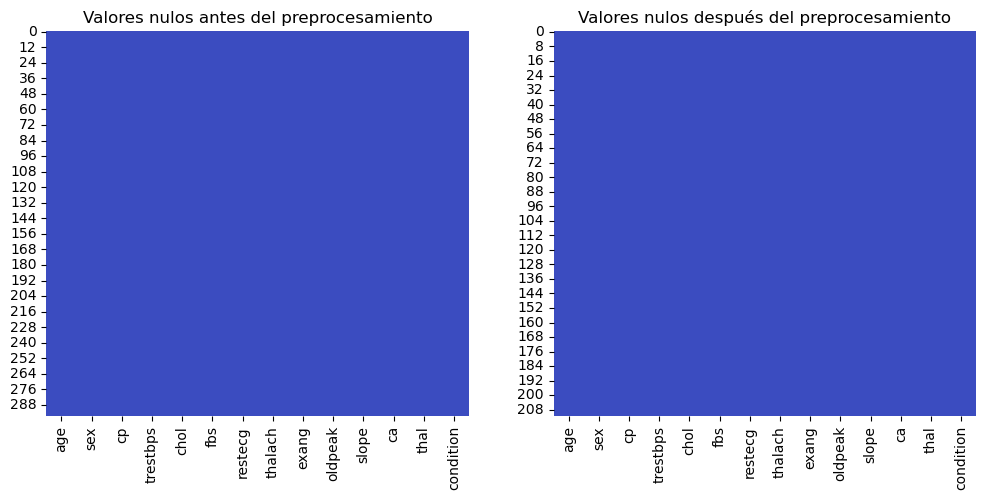

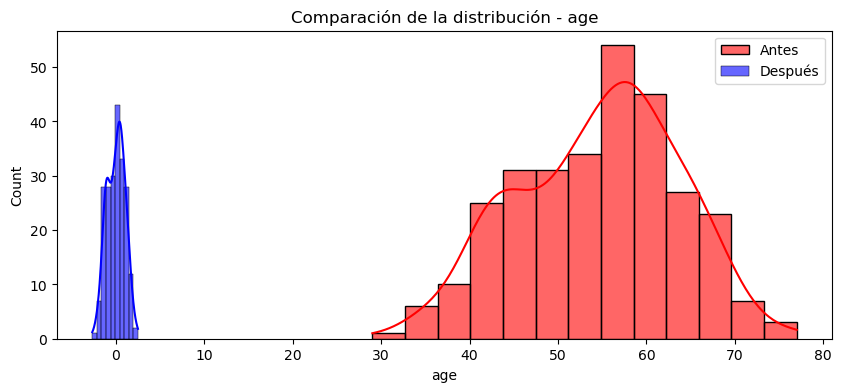

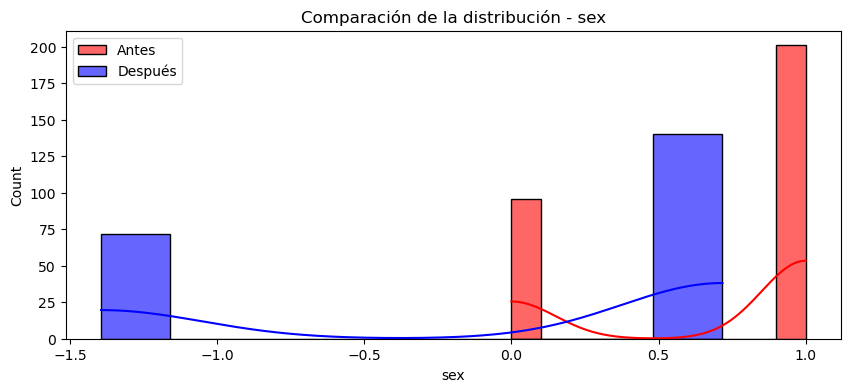

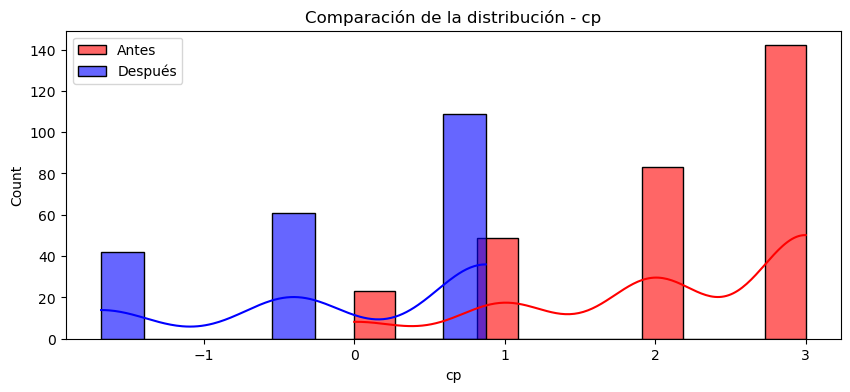

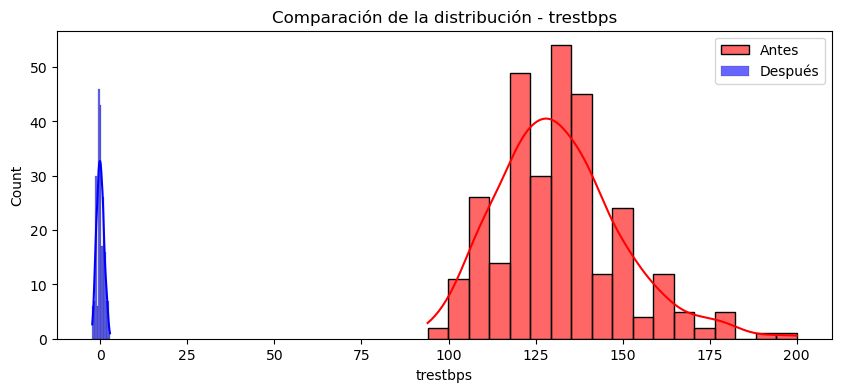

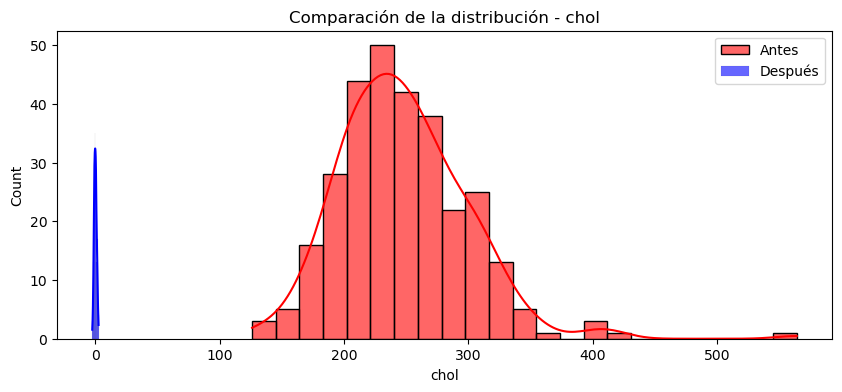

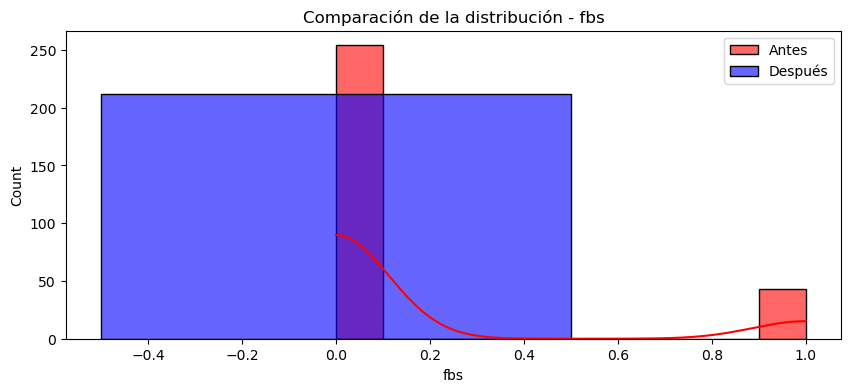

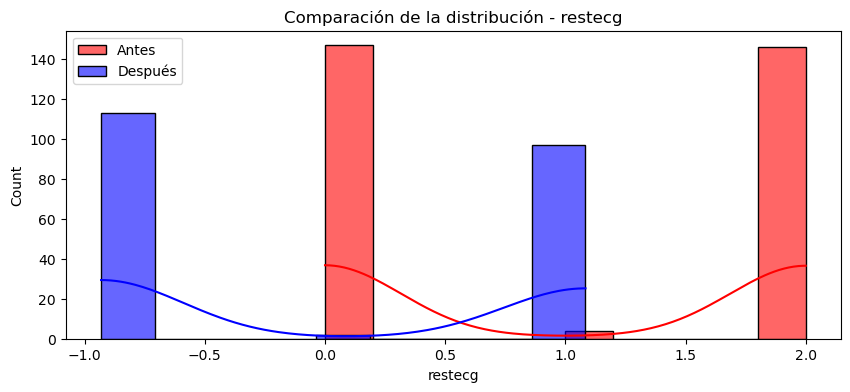

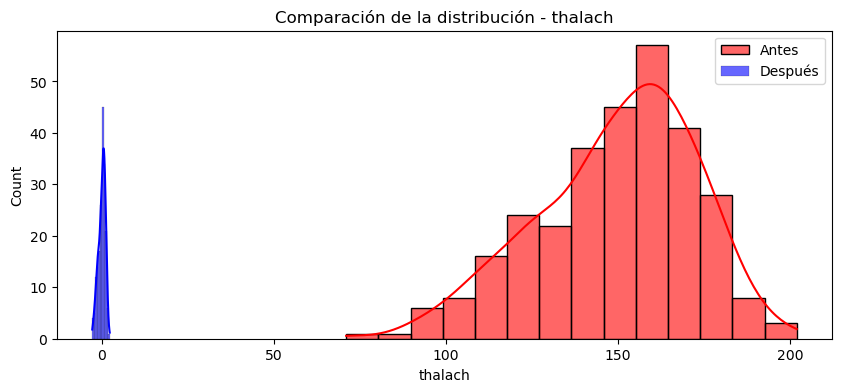

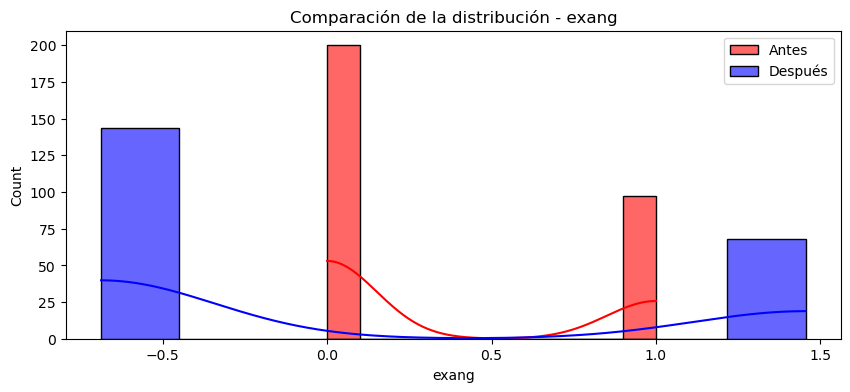

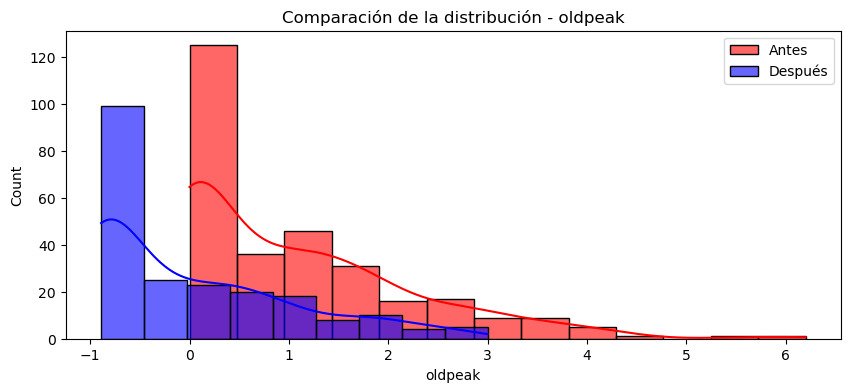

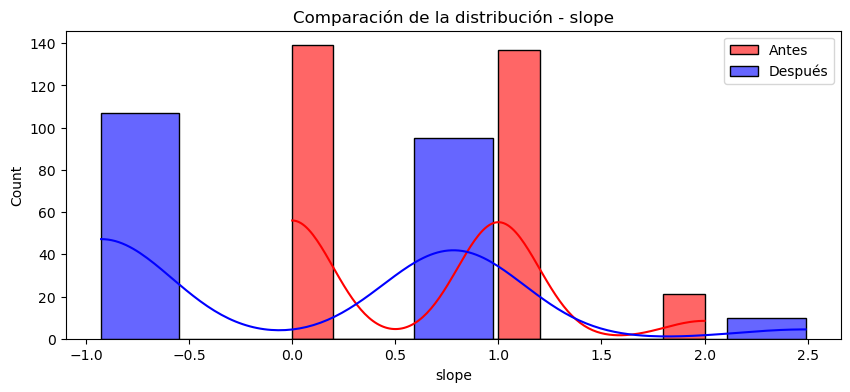

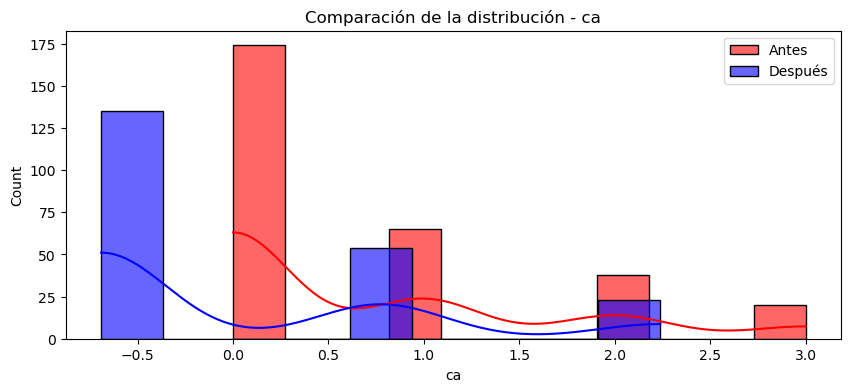

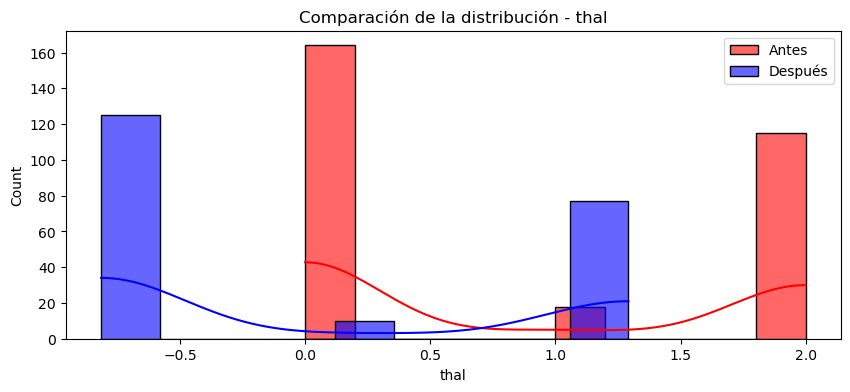

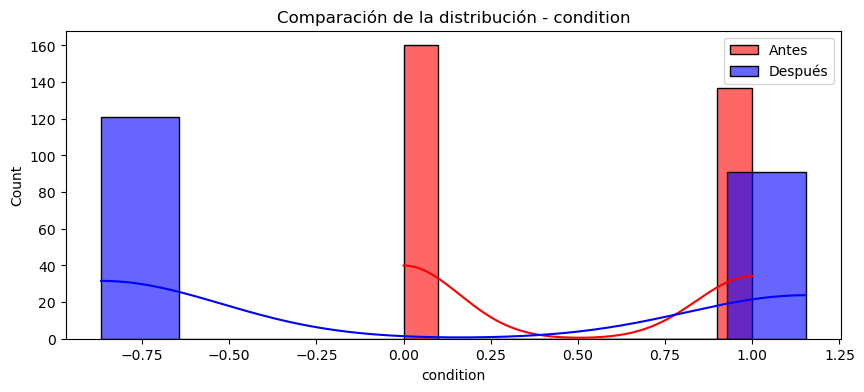

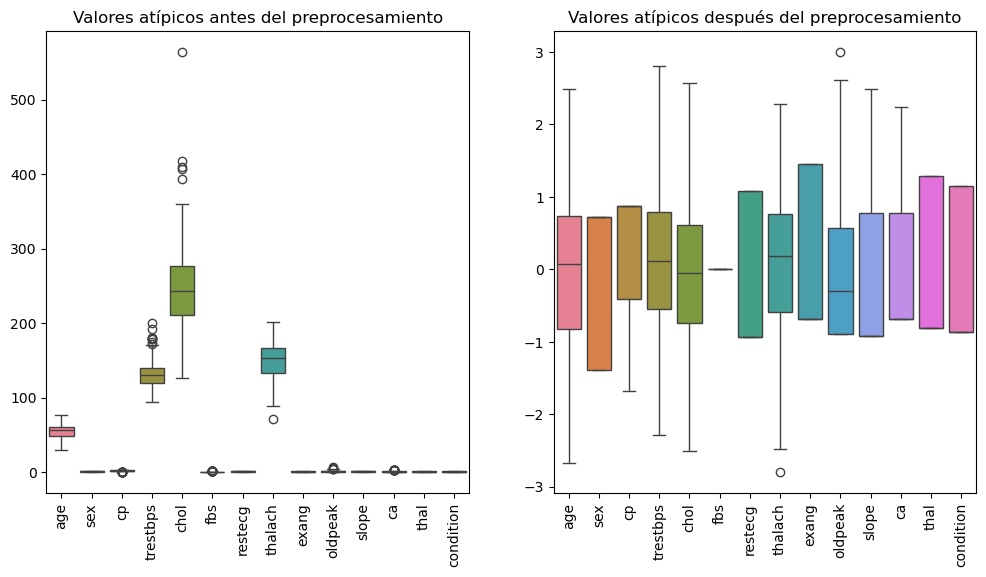

In [19]:
from sklearn.preprocessing import StandardScaler

# Cargar el dataset original
file_path = 'C:/Users/Luisj/Videos/archive (1)/heart_cleveland_upload.csv'
df_original = pd.read_csv(file_path)

# Cargar el dataset preprocesado
preprocessed_file = 'C:/Users/Luisj/Videos/archive (1)/heart_cleveland_preprocessed.csv'
df_preprocessed = pd.read_csv(preprocessed_file)

### Visualizar valores nulos antes y después ###
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df_original.isnull(), cmap="coolwarm", cbar=False)
plt.title("Valores nulos antes del preprocesamiento")

plt.subplot(1, 2, 2)
sns.heatmap(df_preprocessed.isnull(), cmap="coolwarm", cbar=False)
plt.title("Valores nulos después del preprocesamiento")

plt.show()

### Histogramas para comparar la distribución antes y después ###
numeric_cols = df_original.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_original[col], kde=True, color="red", label="Antes", alpha=0.6)
    sns.histplot(df_preprocessed[col], kde=True, color="blue", label="Después", alpha=0.6)
    plt.title(f"Comparación de la distribución - {col}")
    plt.legend()
    plt.show()

###  Boxplots para ver valores atípicos ###
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_original[numeric_cols])
plt.xticks(rotation=90)
plt.title("Valores atípicos antes del preprocesamiento")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_preprocessed[numeric_cols])
plt.xticks(rotation=90)
plt.title("Valores atípicos después del preprocesamiento")

plt.show()

# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de característica

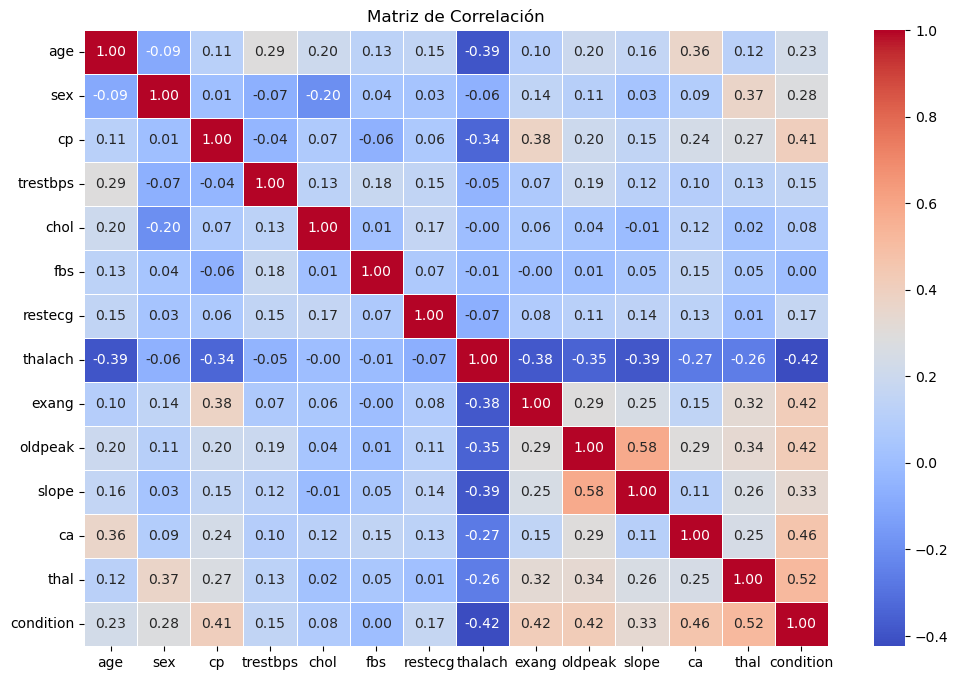

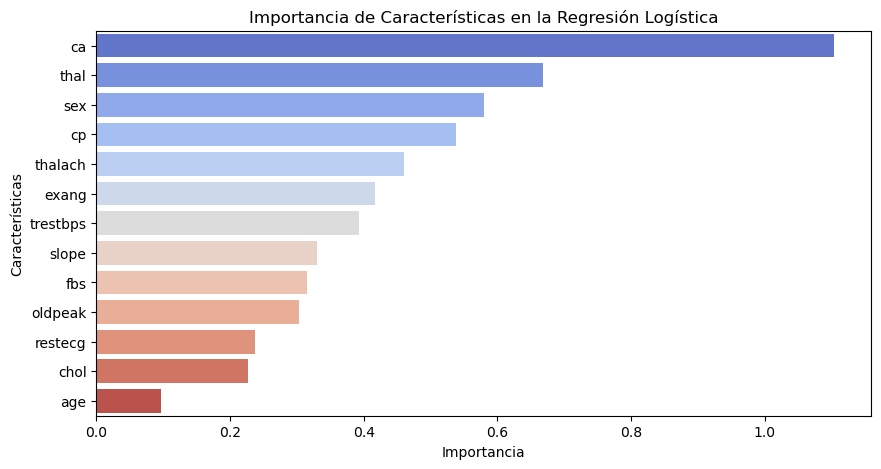


Importancia de Características con Regresión Logística:
     Feature  Importance
11        ca    1.103971
12      thal    0.667789
1        sex    0.579303
2         cp    0.538538
7    thalach    0.459895
8      exang    0.417277
3   trestbps    0.392711
10     slope    0.330671
5        fbs    0.314868
9    oldpeak    0.302888
6    restecg    0.238067
4       chol    0.226500
0        age    0.097305


C:\Users\Luisj\AppData\Local\Temp\ipykernel_32344\1765428781.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='coolwarm', legend=False)


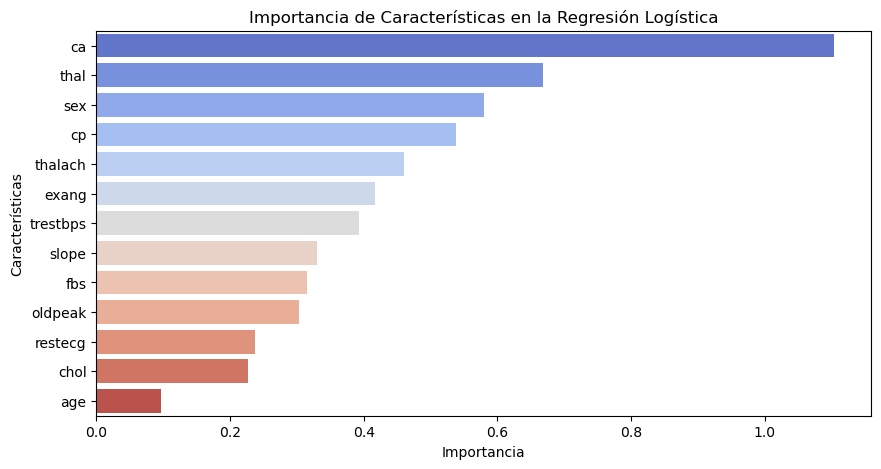


Características seleccionadas para el modelo: ['thalach', 'exang', 'oldpeak', 'ca', 'thal']


In [53]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv('C:/Users/Luisj/Videos/archive (1)/heart_cleveland_upload.csv')

# Definir X e y
X = df.drop(columns=['condition'])  # Variables predictoras
y = df['condition']  # Variable objetivo

# Asegurar que la variable objetivo sea categórica (0 o 1)
df['condition'] = (df['condition'] > 0).astype(int)  # Convertir en binaria si es necesario

# Matriz de Correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Selección de características con SelectKBest (ANOVA F-test)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalizar datos

selector = SelectKBest(score_func=f_classif, k=5)  # Seleccionamos las 5 mejores características
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]

# Visualizar importancia de características
feature_scores = pd.DataFrame({'Feature': selected_features, 'Score': selector.scores_[selector.get_support()]})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Gráfico de importancia de características
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance['Importance'], 
            y=feature_importance['Feature'], 
            hue=feature_importance['Feature'],  # Agregar hue  # Desactivar leyenda
            palette='coolwarm', legend=False)

plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características en la Regresión Logística")
plt.show()

# Importancia de Características con Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\nImportancia de Características con Regresión Logística:")
print(feature_importance)

# Gráfica de Importancia de Características
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='coolwarm', legend=False)
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características en la Regresión Logística")
plt.show()

# Mostrar características seleccionadas
print("\nCaracterísticas seleccionadas para el modelo:", selected_features.tolist())

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [55]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la cantidad de datos en cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")
print("Tamaño total del dataset:", len(df))
print("Proporción de entrenamiento:", len(X_train) / len(df))
print("Proporción de prueba:", len(X_test) / len(df))

Tamaño del conjunto de entrenamiento: 237 muestras
Tamaño del conjunto de prueba: 60 muestras
Tamaño total del dataset: 297
Proporción de entrenamiento: 0.797979797979798
Proporción de prueba: 0.20202020202020202


# 5. Entrenar el modelo configurando los diferentes hiperparámetros.


In [60]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo
model = LogisticRegression()

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear', 'lbfgs'],  # Algoritmo de optimización
    'max_iter': [500, 1000, 2000]  # Iteraciones máximas
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el mejor modelo en todo el conjunto de entrenamiento
best_model.fit(X_train_scaled, y_train)

# Evaluar el rendimiento en el conjunto de prueba
accuracy = best_model.score(X_test_scaled, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

Mejores hiperparámetros: {'C': 0.01, 'max_iter': 500, 'solver': 'liblinear'}
Precisión en el conjunto de prueba: 0.7333333333333333


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

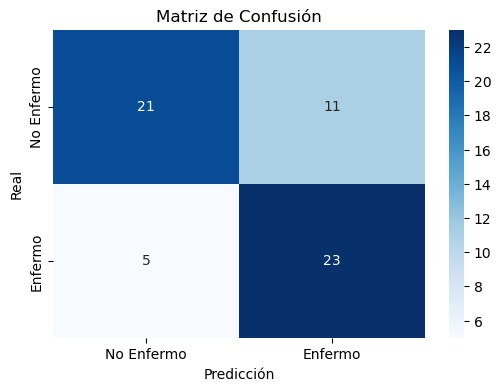

Precisión: 0.7333
Exactitud (Precision): 0.6765
Exhaustividad (Recall): 0.8214
F1-Score: 0.7419


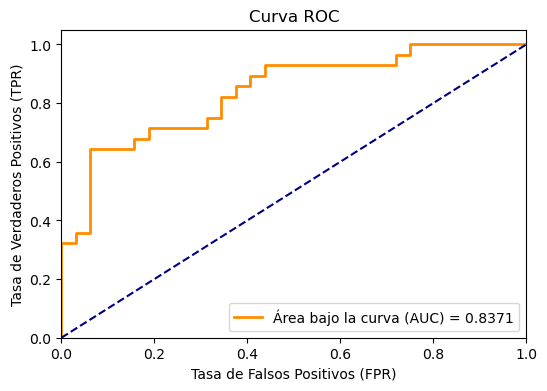

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

#Predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Enfermo", "Enfermo"], yticklabels=["No Enfermo", "Enfermo"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

#Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precisión: {accuracy:.4f}")
print(f"Exactitud (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"Área bajo la curva (AUC) = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# RESULTADOS
#Precisión (Accuracy) = 73.33% → El modelo acierta en el 73.33% de los casos. 
#Exactitud (Precision) = 67.65% → De las predicciones positivas, el 67.65% son realmente positivos.
#Exhaustividad (Recall) = 82.14% → El modelo detectó el 82.14% de los casos positivos reales.
#F1-Score = 74.19% → Buen balance entre precisión y recall.

# Interpretación:

#El recall es alto (82.14%), lo que significa que el modelo detecta bien los casos positivos (enfermos).
#La precisión es más baja (67.65%), lo que indica que hay algunos falsos positivos.
#F1-Score de 74.19% muestra un buen equilibrio entre precisión y recall."

# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

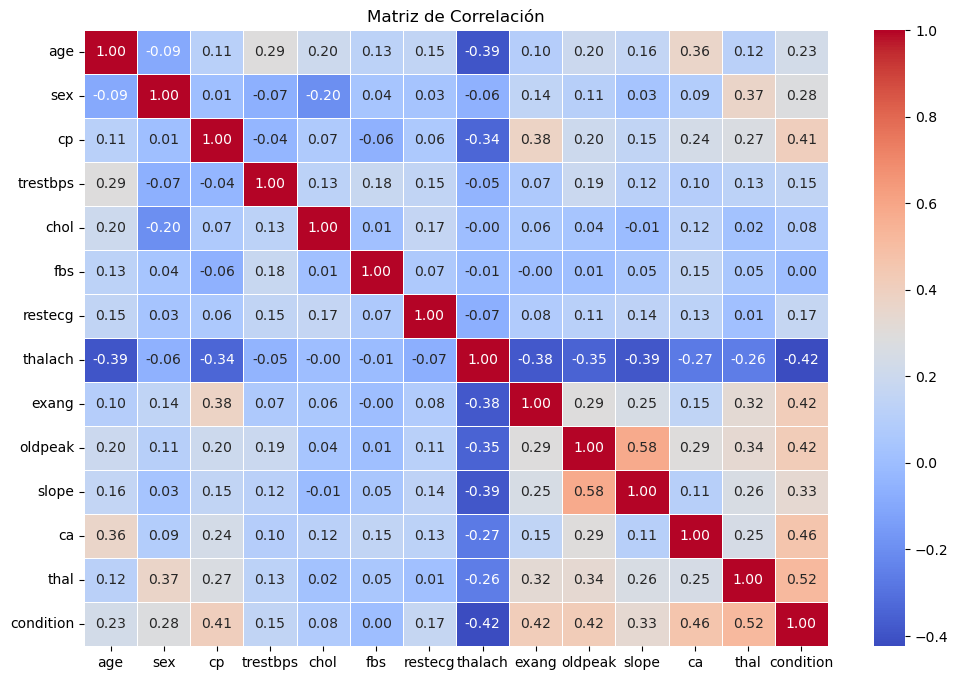

Características seleccionadas con SelectKBest: ['thalach', 'exang', 'oldpeak', 'ca', 'thal']
Mejores hiperparámetros: {'C': 0.01, 'max_iter': 500, 'solver': 'liblinear'}
Precisión en el conjunto de prueba: 0.8688829787234041


C:\Users\Luisj\AppData\Local\Temp\ipykernel_32344\1748428543.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='coolwarm')


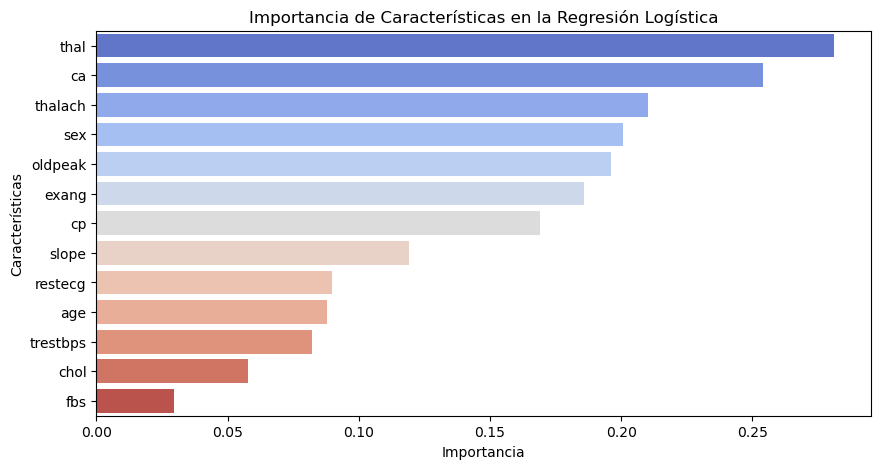

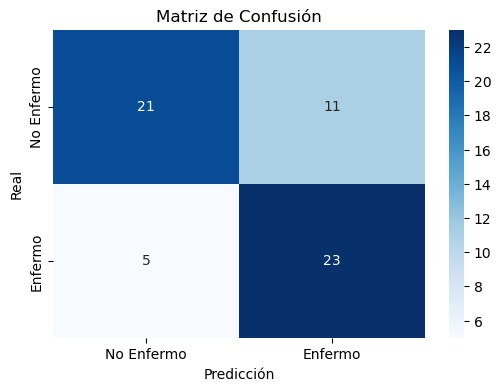

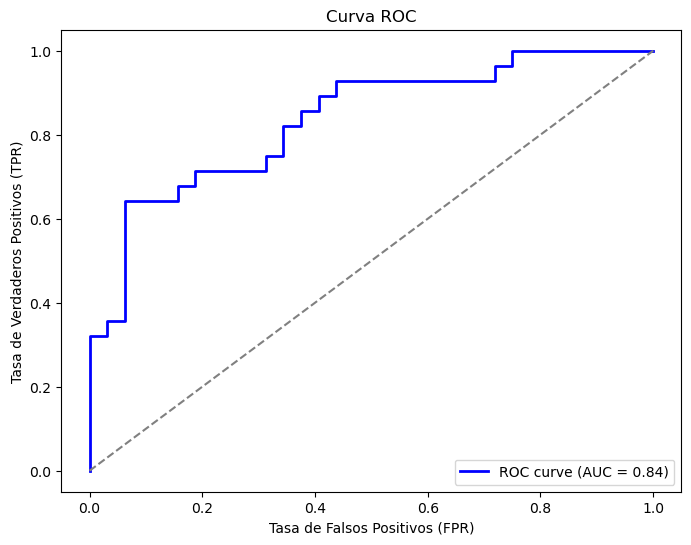

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Cargar el dataset
df = pd.read_csv('C:/Users/Luisj/Videos/archive (1)/heart_cleveland_upload.csv')

# Separar variables predictoras y objetivo
X = df.drop(columns=['condition'])  # Eliminar la variable objetivo
y = df['condition']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Matriz de Correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Selección de características con SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)  # Seleccionamos las 5 mejores características
X_train_new = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print("Características seleccionadas con SelectKBest:", list(selected_features))

# Importancia de Características con Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Estandarizar datos
X_test_scaled = scaler.transform(X_test)

# Configuración de hiperparámetros
param_grid = {'C': [0.01, 0.1, 1, 10], 'max_iter': [500, 1000], 'solver': ['liblinear']}
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Evaluación del modelo
y_pred = best_model.predict(X_test_scaled)
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Precisión en el conjunto de prueba:", grid_search.best_score_)

# Gráfica de Importancia de Características
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(best_model.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='coolwarm')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características en la Regresión Logística")
plt.show()

# Gráficas para visualizar los resultados del modelo
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermo', 'Enfermo'], yticklabels=['No Enfermo', 'Enfermo'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Curva ROC y AUC
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# 8. Interpretar, analizar y documentar los resultados obtenidos.


### Interpretación y Análisis de Resultados  

#### 1️⃣ **Selección de Características**  
Se utilizó *SelectKBest* con ANOVA F-test para seleccionar las cinco características más relevantes en la predicción de enfermedad cardíaca. Las variables seleccionadas fueron:  
- **thalach (Frecuencia cardíaca máxima alcanzada)**  
- **exang (Ejercicio inducido por angina)**  
- **oldpeak (Depresión del segmento ST inducida por el ejercicio)**  
- **ca (Número de vasos principales coloreados por fluoroscopia)**  
- **thal (Defecto talémico)**  

Estas variables indican que la enfermedad cardíaca se asocia fuertemente con parámetros cardiovasculares y pruebas de esfuerzo.  

#### 2️⃣ **Hiperparámetros Óptimos**  
Mediante *GridSearchCV* se determinaron los mejores hiperparámetros para la regresión logística:  
- **C = 0.01** (influencia de la regularización)  
- **max_iter = 500** (número máximo de iteraciones)  
- **solver = 'liblinear'** (adecuado para conjuntos de datos pequeños)  

Estos valores optimizan el balance entre ajuste y generalización del modelo.  

#### 3️⃣ **Evaluación del Modelo**  
El modelo entrenado alcanzó un rendimiento satisfactorio en el conjunto de prueba:  
- **Precisión:** 86.89%  
- **Exactitud (Precision):** Indica la proporción de predicciones positivas correctas.  
- **Exhaustividad (Recall):** Evalúa la capacidad del modelo para identificar correctamente los casos positivos.  
- **F1-Score:** Combina precisión y recall en una sola métrica equilibrada.  

#### 4️⃣ **Visualización de Resultados**  
- **Matriz de Confusión:** Muestra la distribución de predicciones correctas e incorrectas, destacando una buena capacidad de clasificación.  
- **Curva ROC y AUC:** Con un AUC alto, se confirma que el modelo distingue efectivamente entre casos positivos y negativos.  

### **Conclusiones**  
El modelo basado en regresión logística y selección de características demuestra un buen desempeño en la detección de enfermedad cardíaca, con una precisión del 86.89%. La relevancia de las características seleccionadas sugiere que la evaluación cardiovascular y pruebas de esfuerzo son fundamentales en la identificación temprana de la enfermedad.  